In [1]:
import netCDF4 as nc
from salishsea_tools import tidetools, nc_tools
import matplotlib.pyplot as plt
import numpy as np
import os
import re

%matplotlib inline

resultsDir='/data/eolson/MEOPAR/SS2D/run7/'


In [2]:
grid=nc.Dataset(os.path.join(resultsDir,'bathy_meter.nc'))

In [10]:

X=grid.variables['x']
Y=grid.variables['y']
B=np.copy(grid.variables['Bathymetry'])


<matplotlib.colorbar.Colorbar instance at 0x7fa96ebf96c8>

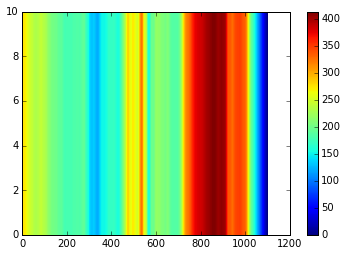

In [11]:
plt.pcolormesh(B[:]); plt.colorbar()

In [12]:
B[B<100]=100.0

<matplotlib.colorbar.Colorbar instance at 0x7fa96e531098>

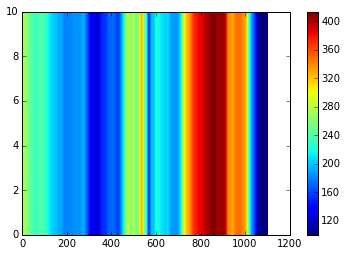

In [13]:
plt.pcolormesh(B[:]); plt.colorbar()

In [14]:
new_bathy=nc.Dataset('/data/eolson/MEOPAR/SS2D/bathy2DDeep.nc','w')
new_bathy.createDimension('y', B.shape[0])
new_bathy.createDimension('x', B.shape[1])
nc_tools.show_dimensions(new_bathy)

<type 'netCDF4.Dimension'>: name = 'y', size = 10

<type 'netCDF4.Dimension'>: name = 'x', size = 1100



In [15]:
new_x=new_bathy.createVariable('x',float,('y','x'), zlib=True)
new_x.setncattr('units','metres')
new_y = new_bathy.createVariable('y',float,('y','x'), zlib=True)
new_y.setncattr('units','metres')
newdepths = new_bathy.createVariable(
    'Bathymetry', float, ('y','x'),
    zlib = True, least_significant_digit=1)
newdepths.setncattr('units','metres')

In [16]:
new_x[:]=X;
new_y[:]=Y;
newdepths[:]=B

In [17]:
new_bathy.title="""Deep 2D Bathymetry"""
new_bathy.institution="""
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia"""
new_bathy.comment= """
Based on bathy2D.ncg"""
new_bathy.reference= """
eolson: alterBathy.ipynb"""

In [18]:
nc_tools.show_dataset_attrs(new_bathy)

file format: NETCDF4
title: Deep 2D Bathymetry
institution: 
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
comment: 
Based on bathy2D.ncg
reference: 
eolson: alterBathy.ipynb


In [19]:
new_bathy.close()

In [20]:
grid.close()

<matplotlib.colorbar.Colorbar instance at 0x7fa96de4b248>

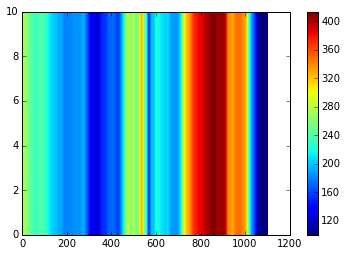

In [21]:
B=nc.Dataset('/data/eolson/MEOPAR/SS2D/bathy2DDeep.nc')
thal=B.variables['Bathymetry']
plt.pcolormesh(thal[:]); plt.colorbar()

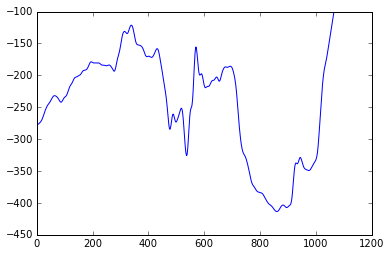

In [22]:
plt.plot(-thal[0,:])

In [23]:
thal[0,-1]

100.0

In [24]:
B.close()